# Yolo-V3 on custom dataset
This week we had to train yolo v3 on a custom dataset.

In [ ]:
import os
os.chdir("/content/drive/My Drive/EVA5/assignment-13")

## Downloading stuff

In [ ]:
%%shell

if [[ ! -d /content/drive/My\ Drive/EVA5/assignment-13/YoloV3Repo ]]; then
    git clone https://github.com/theschoolofai/YoloV3 YoloV3Repo
fi

if [[ ! -d /content/drive/My\ Drive/EVA5/assignment-13/YoloV3Repo/data/YoloV3_Dataset ]]; then
    cp -a YoloV3_Dataset YoloV3Repo/data
fi

mkdir -p YoloV3Repo/weights

## Training
Due to limitations of colab, the training stopped at epoch ~30

In [ ]:
os.chdir("/content/drive/My Drive/EVA5/assignment-13/YoloV3Repo")
! python train.py --data data/YoloV3_Dataset/yolov3.data --batch 10 --cache --cfg yolov3-spp.cfg --epochs 300

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='yolov3-spp.cfg', data='data/YoloV3_Dataset/yolov3.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-23 17:20:34.795534: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (3034 found, 131 missing, 38 empty, 0 duplicate, for 3203 images): 100% 3203/3203 [00:03<00:00, 887.74it/s]
Caching images (1.8GB): 100% 3203/3203 [00:31<00:00, 102.09it/s]
Caching labels (297 found, 14 missing, 7 empty, 0 duplicate, for 318 images): 100% 318/318 [0

## Detecting using dataset

In [ ]:
os.chdir("/content/drive/My Drive/EVA5/assignment-13/YoloV3Repo")
!python detect.py --conf-thres 0.1 --output out_out --cfg yolov3-spp.cfg --source data/YoloV3_Dataset/images/ --names data/YoloV3_Dataset/classes.txt

Namespace(agnostic_nms=False, augment=False, cfg='yolov3-spp.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/YoloV3_Dataset/classes.txt', output='out_out', save_txt=False, source='data/YoloV3_Dataset/images/', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/3590 data/YoloV3_Dataset/images/01-prince-boots - Copy.jpg: 512x448 1 masks, Done. (0.044s)
image 2/3590 data/YoloV3_Dataset/images/026f0ffddc.jpg: 384x512 1 hardhats, 1 vests, 1 masks, Done. (0.038s)
image 3/3590 data/YoloV3_Dataset/images/032620_LS_covid-masks_inline-680.jpg: 320x512 1 hardhats, 1 masks, Done. (0.033s)
image 4/3590 data/YoloV3_Dataset/images/046acbc8e1.jpg: 384x512 1 masks, Done. (0.038s)
image 5/3590 data/YoloV3_Dataset/images/050bdc8229cf18030e2d8a266dd334af84-23-chelsea-boots.rsquare.w1200 -

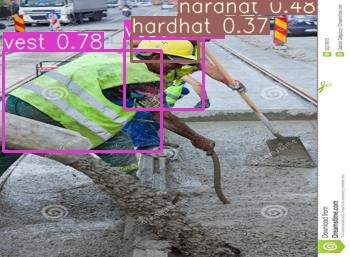

In [ ]:
from IPython.display import Image, clear_output 
Image(filename="out_out/10.jpg", width=600)

## Applying Yolo V3 on frames of a video

In [ ]:
os.chdir("/content/drive/My Drive/EVA5/assignment-13/YoloV3Repo")
!python detect.py --conf-thres 0.1 --output out_out --cfg yolov3-spp.cfg --source ../frames --names data/YoloV3_Dataset/classes.txt

Namespace(agnostic_nms=False, augment=False, cfg='yolov3-spp.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/YoloV3_Dataset/classes.txt', output='out_out', save_txt=False, source='../frames', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/2094 ../frames/out-0001.jpg: 320x512 2 hardhats, 2 vests, Done. (0.033s)
image 2/2094 ../frames/out-0002.jpg: 320x512 2 hardhats, 2 vests, Done. (0.033s)
image 3/2094 ../frames/out-0003.jpg: 320x512 2 hardhats, 2 vests, Done. (0.033s)
image 4/2094 ../frames/out-0004.jpg: 320x512 2 hardhats, 2 vests, Done. (0.033s)
image 5/2094 ../frames/out-0005.jpg: 320x512 2 hardhats, 2 vests, Done. (0.033s)
image 6/2094 ../frames/out-0006.jpg: 320x512 2 hardhats, 2 vests, Done. (0.033s)
image 7/2094 ../frames/out-0007.jpg: 320x512 2 hardhats, 2